# General and Adaptation Priorities

In [2]:
#Importing the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
#Importing the data file "Siaya_UPV_Paragraphs"
file_path = '/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls'

#Use the 'read_excel' function from pandas to import the data
data_frame = pd.read_excel(file_path)
print (data_frame)


                     Extract ID  Start Offset  End Offset Sentiment  \
0      637b9ae8424d8c224095c106             0          56   Neutral   
1      637b9ae8424d8c224095c107            58         109  Negative   
2      637b9ae8424d8c224095c108           110         145   Postive   
3      637b9ae8424d8c224095c109           147         177   Neutral   
4      637b9ae8424d8c224095c10a           179         190   Postive   
...                         ...           ...         ...       ...   
16645  638f1443f5e346dd832bb7b9             0          95  Negative   
16646  638f1443f5e346dd832bb7ba             0         300   Neutral   
16647  638f1443f5e346dd832bb7bb             0          92  Negative   
16648  638f1443f5e346dd832bb7bc            93         147  Negative   
16649  638f1443f5e346dd832bb7ca             0         115   Postive   

                                             Annotations  \
0                                          Food Security   
1                     Food 

In [4]:
#Make a subset of the data file
annotations = data_frame[['Interview ID', 'Annotations', 'Item Name', 'Question', 'What is your gender?', 'Marital Status', 'What is your age?', 'What is the highest level of education have you completed?', 'What is the monthly total income of your household (KES)?']]
annotations
#demographic_data = data_frame [['Interview ID','What is your gender?', 'Marital Status', 'What is your age?', 'What is the highest level of education have you completed?']]

,Interview ID,Annotations,Item Name,Question,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?
0,637b9ae7424d8c224095c0ed,Food Security,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0
1,637b9ae7424d8c224095c0ed,Food Security;Personal performance,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0
2,637b9ae7424d8c224095c0ed,Food Security;Being healthy,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0
3,637b9ae7424d8c224095c0ed,Being healthy,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0
4,637b9ae7424d8c224095c0ed,NaN,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0
...,...,...,...,...,...,...,...,...,...
16645,638f1443f5e346dd832bb77b,Preservation of natural environment;Accessibil...,NaN,"In your own words, how would you describe clim...",Female,Married,75.0,Primary,2000.0
16646,638f1443f5e346dd832bb77b,Time management,NaN,Describe what has changed in your community in...,Female,Married,75.0,Primary,2000.0
16647,638f1443f5e346dd832bb77b,Food Security;Yield,NaN,Why are you most worried about this climate ev...,Female,Married,75.0,Primary,2000.0
16648,638f1443f5e346dd832bb77b,Yield,NaN,Why are you most worried about this climate ev...,Female,Married,75.0,Primary,2000.0


In [5]:
# Split the words in the 'Annotations' column by semicolon and create a new DataFrame with the split words
split_annotations = data_frame['Annotations'].str.split(';').apply(pd.Series)

#Rename the columns and merge with original dataframe
new_column_names = ['Value 1', 'Value 2', 'Value 3', 'Value 4', 'Value 5', 'Value 6', 'Value 7']
split_annotations.columns = new_column_names

merged_annotations = annotations.merge(split_annotations, left_index=True, right_index=True)

#Drop the original annotations column
merged_annotations.drop(columns=['Annotations'], inplace=True)
merged_annotations

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_96450/1431691063.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  split_annotations = data_frame['Annotations'].str.split(';').apply(pd.Series)


,Interview ID,Item Name,Question,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,Value 1,Value 2,Value 3,Value 4,Value 5,Value 6,Value 7
0,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Food Security,NaN,NaN,NaN,NaN,NaN,NaN
1,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Food Security,Personal performance,NaN,NaN,NaN,NaN,NaN
2,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Food Security,Being healthy,NaN,NaN,NaN,NaN,NaN
3,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Being healthy,NaN,NaN,NaN,NaN,NaN,NaN
4,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,638f1443f5e346dd832bb77b,NaN,"In your own words, how would you describe clim...",Female,Married,75.0,Primary,2000.0,Preservation of natural environment,Accessibility to services,NaN,NaN,NaN,NaN,NaN
16646,638f1443f5e346dd832bb77b,NaN,Describe what has changed in your community in...,Female,Married,75.0,Primary,2000.0,Time management,NaN,NaN,NaN,NaN,NaN,NaN
16647,638f1443f5e346dd832bb77b,NaN,Why are you most worried about this climate ev...,Female,Married,75.0,Primary,2000.0,Food Security,Yield,NaN,NaN,NaN,NaN,NaN
16648,638f1443f5e346dd832bb77b,NaN,Why are you most worried about this climate ev...,Female,Married,75.0,Primary,2000.0,Yield,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
##Important Items
#Filter the dataframe by climate item question "Given the chosen climate event - which 3 items are most useful to you?"

dev_df = merged_annotations[merged_annotations['Question'] == 'Which 5 items are most important to you in your daily life? Please indicate these in order of importance, starting with the most important']
dev_df

,Interview ID,Item Name,Question,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,Value 1,Value 2,Value 3,Value 4,Value 5,Value 6,Value 7
0,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Food Security,NaN,NaN,NaN,NaN,NaN,NaN
1,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Food Security,Personal performance,NaN,NaN,NaN,NaN,NaN
2,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Food Security,Being healthy,NaN,NaN,NaN,NaN,NaN
3,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Being healthy,NaN,NaN,NaN,NaN,NaN,NaN
4,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,638f1443f5e346dd832bb77b,Vegetables,Which 5 items are most important to you in you...,Female,Married,75.0,Primary,2000.0,Food Security,NaN,NaN,NaN,NaN,NaN,NaN
16628,638f1443f5e346dd832bb77b,Vegetables,Which 5 items are most important to you in you...,Female,Married,75.0,Primary,2000.0,Food Security,Being healthy,Personal performance,Clean Air,NaN,NaN,NaN
16629,638f1443f5e346dd832bb77b,Vegetables,Which 5 items are most important to you in you...,Female,Married,75.0,Primary,2000.0,Being healthy,Food Security,NaN,NaN,NaN,NaN,NaN
16630,638f1443f5e346dd832bb77b,Vegetables,Which 5 items are most important to you in you...,Female,Married,75.0,Primary,2000.0,Food Security,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

# Initialize an empty list to store the transformed data
trans_dev_df1 = []

# Iterate over each row in the initial table
for _, row in dev_df.iterrows():
    interview_id = row['Interview ID']
    item = row['Item Name']
    gender = row[ 'What is your gender?']
    marital_status = row['Marital Status'] 
    age = row['What is your age?'] 
    education = row['What is the highest level of education have you completed?']
    income = row['What is the monthly total income of your household (KES)?']
    values = [row['Value 1'], row['Value 2'], row['Value 3']]

    # Create a new row for each value
    for value in values:
        trans_dev_df1.append({
            'Interview ID': interview_id,
            'Item Name': item,
            'What is your gender?': gender,
            'Marital Status': marital_status,
            'What is your age?': age,
            'What is the highest level of education have you completed?': education,
            'What is the monthly total income of your household (KES)?': income,
            'Values': value
        })

# Create the transformed table
trans_dev_df = pd.DataFrame(trans_dev_df1)

trans_dev_df

,Interview ID,Item Name,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,Values
0,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Food Security
1,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,NaN
2,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,NaN
3,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Food Security
4,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Personal performance
...,...,...,...,...,...,...,...,...
18268,638f1443f5e346dd832bb77b,Vegetables,Female,Married,75.0,Primary,2000.0,NaN
18269,638f1443f5e346dd832bb77b,Vegetables,Female,Married,75.0,Primary,2000.0,NaN
18270,638f1443f5e346dd832bb77b,Water,Female,Married,75.0,Primary,2000.0,Water Security
18271,638f1443f5e346dd832bb77b,Water,Female,Married,75.0,Primary,2000.0,Being healthy


In [8]:
#Drop the NaN values in 
dev_df2 = trans_dev_df.dropna(subset=['Values'])
dev_df2

,Interview ID,Item Name,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,Values
0,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Food Security
3,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Food Security
4,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Personal performance
6,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Food Security
7,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Being healthy
...,...,...,...,...,...,...,...,...
18265,638f1443f5e346dd832bb77b,Vegetables,Female,Married,75.0,Primary,2000.0,Food Security
18267,638f1443f5e346dd832bb77b,Vegetables,Female,Married,75.0,Primary,2000.0,Food Security
18270,638f1443f5e346dd832bb77b,Water,Female,Married,75.0,Primary,2000.0,Water Security
18271,638f1443f5e346dd832bb77b,Water,Female,Married,75.0,Primary,2000.0,Being healthy


In [9]:
#Assign a weight to each value
# Create an empty list to store the calculated weights
weights = []

# Iterate through unique Interview IDs
for interview_id in dev_df2['Interview ID'].unique():
    # Get a subset of the DataFrame for the current Interview ID
    subset = dev_df2[dev_df2['Interview ID'] == interview_id]
    
    # Calculate the count of each item within the current Interview ID
    item_counts = subset['Item Name'].value_counts()
    
    # Map the item counts to the corresponding rows in the subset
    weight_values = subset['Item Name'].map(1 / item_counts).fillna(1)
    
    # Assign the calculated weights to the 'Weight' column in the original DataFrame
    dev_df2.loc[subset.index, 'Weight'] = weight_values

dev_df2

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_96450/731263889.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df2.loc[subset.index, 'Weight'] = weight_values


,Interview ID,Item Name,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,Values,Weight
0,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Food Security,0.166667
3,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Food Security,0.166667
4,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Personal performance,0.166667
6,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Food Security,0.166667
7,637b9ae7424d8c224095c0ed,Vegetables,Male,Married,38.0,Secondary,5000.0,Being healthy,0.166667
...,...,...,...,...,...,...,...,...,...
18265,638f1443f5e346dd832bb77b,Vegetables,Female,Married,75.0,Primary,2000.0,Food Security,0.142857
18267,638f1443f5e346dd832bb77b,Vegetables,Female,Married,75.0,Primary,2000.0,Food Security,0.142857
18270,638f1443f5e346dd832bb77b,Water,Female,Married,75.0,Primary,2000.0,Water Security,0.333333
18271,638f1443f5e346dd832bb77b,Water,Female,Married,75.0,Primary,2000.0,Being healthy,0.333333


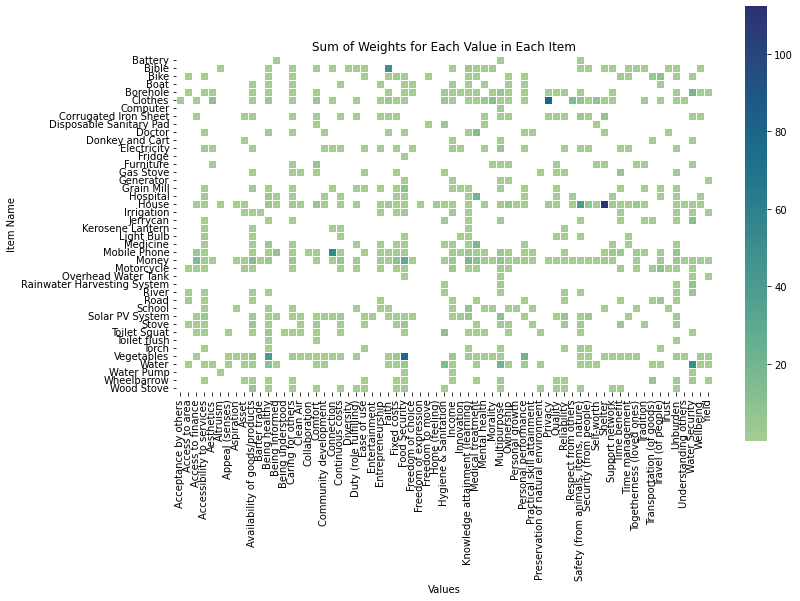

In [10]:
# Create a pivot table with 'Item Name' as index and 'Values' as columns, and calculate the sum of 'Weight' for each combination
pivot_table1 = dev_df2.pivot_table(index='Item Name', columns='Values', values='Weight', aggfunc='sum')

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(pivot_table1, cmap='crest', annot=False,linewidths=0.5, fmt='.2f', cbar=True, square=True, xticklabels= True, yticklabels = True)

# Set the plot title and axis labels
plt.title('Sum of Weights for Each Value in Each Item')
plt.xlabel('Values')
plt.ylabel('Item Name')

# Show the plot
plt.show()

In [11]:
pivot_table1

Values,Acceptance by others,Access to area,Access to finance,Accessibility to services,Aesthetics,Altruism,Appeal (senses),Aspiration,Asset,Availability of goods/products,...,Togetherness (loved ones),Tradition,Transportation (of goods),Travel (of people),Trust,Unburden,Understanding others,Water Security,Wellbeing,Yield
Item Name,,,,,,,,,,,,,,,,,,,,,
Battery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bible,NaN,NaN,NaN,NaN,NaN,0.208333,NaN,NaN,NaN,NaN,...,1.323131,0.125000,NaN,NaN,0.166667,0.245882,NaN,NaN,0.350000,NaN
Bike,NaN,0.200000,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,9.373016,NaN,0.687302,NaN,1.216667,NaN,NaN
Boat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,...,NaN,NaN,NaN,0.936111,NaN,NaN,NaN,NaN,NaN,NaN
Borehole,NaN,0.083333,NaN,1.326623,0.166667,NaN,NaN,NaN,NaN,0.598485,...,NaN,NaN,NaN,NaN,NaN,0.761905,NaN,19.216955,0.166667,0.678571
Clothes,1.177778,NaN,0.300000,NaN,9.418926,NaN,NaN,NaN,NaN,0.911111,...,NaN,2.361447,NaN,0.250000,NaN,1.000000,0.166667,NaN,NaN,NaN
Computer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corrugated Iron Sheet,NaN,NaN,0.142857,NaN,NaN,NaN,NaN,NaN,0.111111,0.583333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285714,0.125000,NaN
Disposable Sanitary Pad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Adaptation Priorities

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_96450/940147439.py:16: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  split_annotations = data_frame['Annotations'].str.split(';').apply(pd.Series)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_96450/940147439.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df2.loc[subset.index, 'Weight'] = weight_values


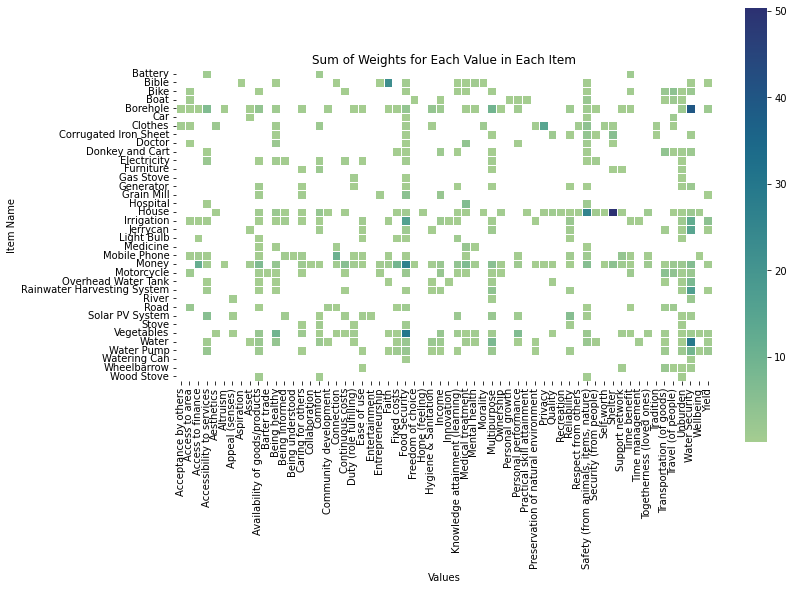

In [12]:


#Importing the data file "Siaya_UPV_Paragraphs"
file_path = '/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls'

#Use the 'read_excel' function from pandas to import the data
data_frame = pd.read_excel(file_path)


#Make a subset of the data file
annotations = data_frame[['Interview ID', 'Annotations', 'Item Name', 'Question', 'What is your gender?', 'Marital Status', 'What is your age?', 'What is the highest level of education have you completed?', 'What is the monthly total income of your household (KES)?']]
annotations
#demographic_data = data_frame [['Interview ID','What is your gender?', 'Marital Status', 'What is your age?', 'What is the highest level of education have you completed?']]

# Split the words in the 'Annotations' column by semicolon and create a new DataFrame with the split words
split_annotations = data_frame['Annotations'].str.split(';').apply(pd.Series)

#Rename the columns and merge with original dataframe
new_column_names = ['Value 1', 'Value 2', 'Value 3', 'Value 4', 'Value 5', 'Value 6', 'Value 7']
split_annotations.columns = new_column_names

merged_annotations = annotations.merge(split_annotations, left_index=True, right_index=True)

#Drop the original annotations column
merged_annotations.drop(columns=['Annotations'], inplace=True)
merged_annotations

##Climate Adaptation Items
#Filter the dataframe by climate item question "Given the chosen climate event - which 3 items are most useful to you?"

climate_df = merged_annotations[merged_annotations['Question'] == 'Given the chosen climate event - which 3 items are most useful to you?']
climate_df


# Initialize an empty list to store the transformed data
trans_climate_df1 = []

# Iterate over each row in the initial table
for _, row in climate_df.iterrows():
    interview_id = row['Interview ID']
    item = row['Item Name']
    gender = row[ 'What is your gender?']
    marital_status = row['Marital Status'] 
    age = row['What is your age?'] 
    education = row['What is the highest level of education have you completed?']
    income = row['What is the monthly total income of your household (KES)?']
    values = [row['Value 1'], row['Value 2'], row['Value 3']]

    # Create a new row for each value
    for value in values:
        trans_climate_df1.append({
            'Interview ID': interview_id,
            'Item Name': item,
            'What is your gender?': gender,
            'Marital Status': marital_status,
            'What is your age?': age,
            'What is the highest level of education have you completed?': education,
            'What is the monthly total income of your household (KES)?': income,
            'Values': value
        })

# Create the transformed table
trans_climate_df = pd.DataFrame(trans_climate_df1)

trans_climate_df

#Drop the NaN values in 
climate_df2 = trans_climate_df.dropna(subset=['Values'])
climate_df2

#Assign a weight to each value
# Create an empty list to store the calculated weights
weights = []

# Iterate through unique Interview IDs
for interview_id in climate_df2['Interview ID'].unique():
    # Get a subset of the DataFrame for the current Interview ID
    subset = climate_df2[climate_df2['Interview ID'] == interview_id]
    
    # Calculate the count of each item within the current Interview ID
    item_counts = subset['Item Name'].value_counts()
    
    # Map the item counts to the corresponding rows in the subset
    weight_values = subset['Item Name'].map(1 / item_counts).fillna(1)
    
    # Assign the calculated weights to the 'Weight' column in the original DataFrame
    climate_df2.loc[subset.index, 'Weight'] = weight_values

climate_df2

# Create a pivot table with 'Item Name' as index and 'Values' as columns, and calculate the sum of 'Weight' for each combination
pivot_table2 = climate_df2.pivot_table(index='Item Name', columns='Values', values='Weight', aggfunc='sum')

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(pivot_table2, cmap='crest', annot=False,linewidths=0.5, fmt='.2f', cbar=True, square=True, xticklabels= True, yticklabels = True)

# Set the plot title and axis labels
plt.title('Sum of Weights for Each Value in Each Item')
plt.xlabel('Values')
plt.ylabel('Item Name')


# Show the plot
plt.show()

In [25]:
# Create an empty list to store the values and their corresponding row and column
result_list = []

# Loop through each cell in the data frame
for row_index, row in pivot_table1.iterrows():
    for col_index, value in row.items():
        if pd.notna(value) and value > 10.0:
            result_list.append((row_index, col_index, value))

# Create a new data frame to store the results
result_df = pd.DataFrame(result_list, columns=['Item Name', 'Column', 'Value'])

result_df = result_df.sort_values(by='Value', ascending=False)

result_df

,Item Name,Column,Value
8,House,Shelter,112.251645
3,Clothes,Privacy,78.223693
19,Vegetables,Food Security,75.782788
11,Mobile Phone,Connection,53.639010
23,Water,Water Security,51.170747
0,Bible,Faith,46.783779
18,Vegetables,Being healthy,39.695041
7,House,"Safety (from animals, items, nature)",39.417273
14,Money,Food Security,29.386849
20,Vegetables,Personal performance,21.257628


In [22]:
# Create an empty list to store the values and their corresponding row and column
result_list2 = []

# Loop through each cell in the data frame
for row_index, row in pivot_table2.iterrows():
    for col_index, value in row.items():
        if pd.notna(value) and value > 10.0:
            result_list2.append((row_index, col_index, value))

# Create a new data frame to store the results
result_df2 = pd.DataFrame(result_list2, columns=['Item Name', 'Column', 'Value'])

result_df2 = result_df2.sort_values(by='Value', ascending=False)

result_df2

,Item Name,Column,Value
8,House,Shelter,50.372475
3,Borehole,Water Security,39.911693
26,Vegetables,Food Security,29.938889
29,Water,Water Security,29.200180
17,Money,Food Security,26.441653
7,House,"Safety (from animals, items, nature)",25.450036
0,Bible,Faith,22.233333
22,Rainwater Harvesting System,Water Security,16.500000
9,Irrigation,Food Security,16.098810
4,Clothes,Privacy,14.633333


In [26]:
import plotly.express as px

# Get the unique values in the 'Column' column from both DataFrames
unique_values = set(result_df['Column'].unique()) | set(result_df2['Column'].unique())

# Create a custom color palette with enough unique colors
custom_color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
                        '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5']

color_mapping = {value: custom_color_palette[i % len(custom_color_palette)] for i, value in enumerate(unique_values)}

# Create the first treemap using Plotly Express with the specified color mapping
dev1_fig = px.treemap(result_df, path=['Column'], values='Value', color='Column', color_discrete_map=color_mapping)
dev1_fig.update_traces(textinfo="label+value", hoverinfo='label+value', texttemplate='%{label}: %{value:.0f}')
dev1_fig.update_layout(title_text="Treemap of General Values",
                      font=dict(
                          family="Arial",  # Change the font family to your desired font
                          size=16  # Change the font size to your desired size
                      ))

# Create the second treemap using Plotly Express with the same color mapping
dev2_fig = px.treemap(result_df2, path=['Column'], values='Value', color='Column', color_discrete_map=color_mapping)
dev2_fig.update_traces(textinfo="label+value", hoverinfo='label+value', texttemplate='%{label}: %{value:.0f}')
dev2_fig.update_layout(title_text="Treemap of Adaptation Values",
                      font=dict(
                          family="Arial",  # Change the font family to your desired font
                          size=16  # Change the font size to your desired size
                      ))

# Show both treemaps
dev1_fig.show()
dev2_fig.show()
